In [1]:
# data analysis, preprocessing handling missing values remove outliers
import pandas as pd
import numpy as np
import random
import time
import operator

In [2]:
#data visualisation and to detect the presence of outliers
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap 
%matplotlib inline

In [3]:
# data preparation for training models, model selection and splitting the data
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, f_regression, chi2

In [4]:
# data models to implement
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, NuSVC,LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [5]:
# data evaluation
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

In [6]:
orig_df = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')

In [7]:
df = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')

In [8]:
df.shape

(614, 13)

In [9]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [11]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [12]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [13]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
df.drop(['Loan_ID'], axis = 1, inplace = True)

In [15]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [16]:
nums = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [17]:
cat_cols = ['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area','Loan_Status']
for i in cat_cols:
    print(df[i].value_counts())

Male      489
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64
1.0    475
0.0     89
Name: Credit_History, dtype: int64
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Y    422
N    192
Name: Loan_Status, dtype: int64


In [18]:
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [20]:
def encode(df):
    df['Gender']=df['Gender'].map( {"Male":0,"Female":1} )
    df['Married'] = df['Married'].map({"No":0,"Yes":1})
    df['Dependents'] = df['Dependents'].map({"0":0,"1":1,"2":2,"3+":3})
    df['Education'] = df['Education'].map({"Not Graduate":0,"Graduate":1})
    df['Self_Employed'] = df['Self_Employed'].map({"No":0,"Yes":1})
    df['Property_Area'] = df['Property_Area'].map({"Urban":0,"Rural":1,"Semiurban":2})
    df['Loan_Status'] = df['Loan_Status'].map({"N":0,"Y":1})
    return df

In [21]:
def decode(df):
    df['Gender'] = df['Gender'].map({0:"Male",1:"Female"})
    df['Married'] = df['Married'].map({0:"No",1:"Yes"})
    df['Dependents'] = df['Dependents'].map({0.0:"0",1.0:"1",2.0:"2",3.0:"3+"})
    df['Education'] = df['Education'].map({0:"Not Graduate",1:"Graduate"})
    df['Self_Employed'] = df['Self_Employed'].map({0:"No",1:"Yes"})
    df['Property_Area'] = df['Property_Area'].map({0:"Urban",1:"Rural",2:"Semiurban"})
    df['Loan_Status'] = df['Loan_Status'].map({0:"N",1:"Y"})
    return df

In [22]:
def label_encoder(df, cat):
    le = LabelEncoder()
    le.fit(df[cat])
    df[cat] - le.transform(df[cat])
    return df

In [23]:
df = encode(df)

In [24]:
df['Gender'].fillna(df['Gender'].median(), inplace = True)
df['Married'].fillna(df['Married'].median(),inplace = True)
df['Dependents'].fillna(df['Dependents'].median(), inplace = True)
df['Self_Employed'].fillna(df['Self_Employed'].median(),inplace = True)
df['Credit_History'].fillna(df['Credit_History'].median(), inplace = True)

In [25]:
df.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [26]:
# now we will try to substitute the continuous variables 
from sklearn.ensemble import RandomForestRegressor
df_yes = df[df['LoanAmount'].notnull()]
df_no = df[df['LoanAmount'].isnull()]
rfr = RandomForestRegressor()
df_yesX = df_yes.drop(['LoanAmount','Loan_Amount_Term'], axis = 1).values
df_yesY = df_yes['LoanAmount'].values
rfr.fit(df_yesX,df_yesY)
df_noX = df_no.drop(['LoanAmount','Loan_Amount_Term'], axis = 1).values
df_noY = rfr.predict(df_noX)
df_no.loc[:,'LoanAmount'] = df_noY
loan_one = np.vstack([df_yes,df_no])
loan_df = pd.DataFrame(loan_one, columns = df.columns, index = df.index)

C:\Users\User2-NB\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [27]:
loan_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1.0,1.0,1.0,0.0,4583.0,1508.0,128.00,360.0,1.0,1.0,0.0
1,0.0,1.0,0.0,1.0,1.0,3000.0,0.0,66.00,360.0,1.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,2583.0,2358.0,120.00,360.0,1.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,6000.0,0.0,141.00,360.0,1.0,0.0,1.0
4,0.0,1.0,2.0,1.0,1.0,5417.0,4196.0,267.00,360.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,1.0,2.0,1.0,0.0,2947.0,1603.0,115.76,360.0,1.0,0.0,0.0
610,0.0,0.0,0.0,1.0,0.0,4680.0,2087.0,165.38,360.0,1.0,2.0,0.0
611,0.0,1.0,2.0,1.0,1.0,6633.0,0.0,155.53,360.0,0.0,1.0,0.0
612,0.0,1.0,1.0,0.0,0.0,2492.0,2375.0,126.01,360.0,1.0,1.0,1.0


In [28]:
loan_df.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [29]:
loan_df.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [30]:
from sklearn.ensemble import RandomForestRegressor
df_yes = loan_df[loan_df['Loan_Amount_Term'].notnull()]
df_no = loan_df[loan_df['Loan_Amount_Term'].isnull()]
rfr = RandomForestRegressor()
df_yesX = df_yes.drop(['Loan_Amount_Term'], axis = 1).values
df_yesY = df_yes['Loan_Amount_Term'].values
rfr.fit(df_yesX,df_yesY)
df_noX = df_no.drop(['Loan_Amount_Term'], axis = 1).values
df_noY = rfr.predict(df_noX)
df_no.loc[:,'Loan_Amount_Term'] = df_noY
term_one = np.vstack([df_yes,df_no])
new_df = pd.DataFrame(term_one, columns = df.columns, index = df.index)

C:\Users\User2-NB\anaconda3\lib\site-packages\pandas\core\indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [31]:
new_df = decode(new_df)

In [32]:
new_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.00,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.00,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.00,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.00,1.0,Urban,Y
4,Male,Yes,2,Graduate,Yes,5417.0,4196.0,267.0,360.00,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Male,No,0,Not Graduate,No,3189.0,2598.0,120.0,354.60,1.0,Rural,Y
610,Male,Yes,0,Graduate,Yes,5503.0,4490.0,70.0,245.64,1.0,Semiurban,Y
611,Male,No,0,Graduate,No,5124.0,0.0,124.0,361.80,0.0,Rural,N
612,Female,No,0,Not Graduate,No,2720.0,0.0,80.0,271.56,0.0,Urban,N


In [33]:
new_df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [34]:
for i in ['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area','Loan_Status']:
    print(new_df[i].value_counts())

Male      502
Female    112
Name: Gender, dtype: int64
Yes    401
No     213
Name: Married, dtype: int64
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
No     532
Yes     82
Name: Self_Employed, dtype: int64
1.0    525
0.0     89
Name: Credit_History, dtype: int64
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Y    422
N    192
Name: Loan_Status, dtype: int64


In [35]:
def usual_countplots(df,feats):
    fir, axes = plt.subplots(nrows = len(feats), ncols = 1, figsize = (15,45))
    for i,j in enumerate(feats):
        ax_title = j.capitalize() + " frequency count"
        ax = sns.countplot(x=j, data=df, ax = axes[i])
        for p in ax.patches:
            ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
        axes[i].set_title(ax_title, fontdict = {'size':15})
        axes[i].set_xlabel(j, fontsize = 15)
        axes[i].set_ylabel('Frequency', fontsize = 15)
        axes[i].set_xticklabels(df[j].value_counts().index, Fontsize = 15)
        axes[i].set_yticklabels(np.arange(0,df[j].value_counts()[0],10), Fontsize = 15)
    plt.tight_layout()
    plt.show()

<ipython-input-35-e14014acd815>:11: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axes[i].set_xticklabels(df[j].value_counts().index, Fontsize = 15)
<ipython-input-35-e14014acd815>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_yticklabels(np.arange(0,df[j].value_counts()[0],10), Fontsize = 15)
<ipython-input-35-e14014acd815>:12: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axes[i].set_yticklabels(np.arange(0,df[j].value_counts()[0],10), Fontsize = 15)
<ipython-input-35-e14014acd815>:11: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axes[i].set_xticklabels(df[j].value_counts().index, Fontsize = 15)
<ipython-input-35-e14014acd815>:12: UserWarning: FixedFormatter should only b

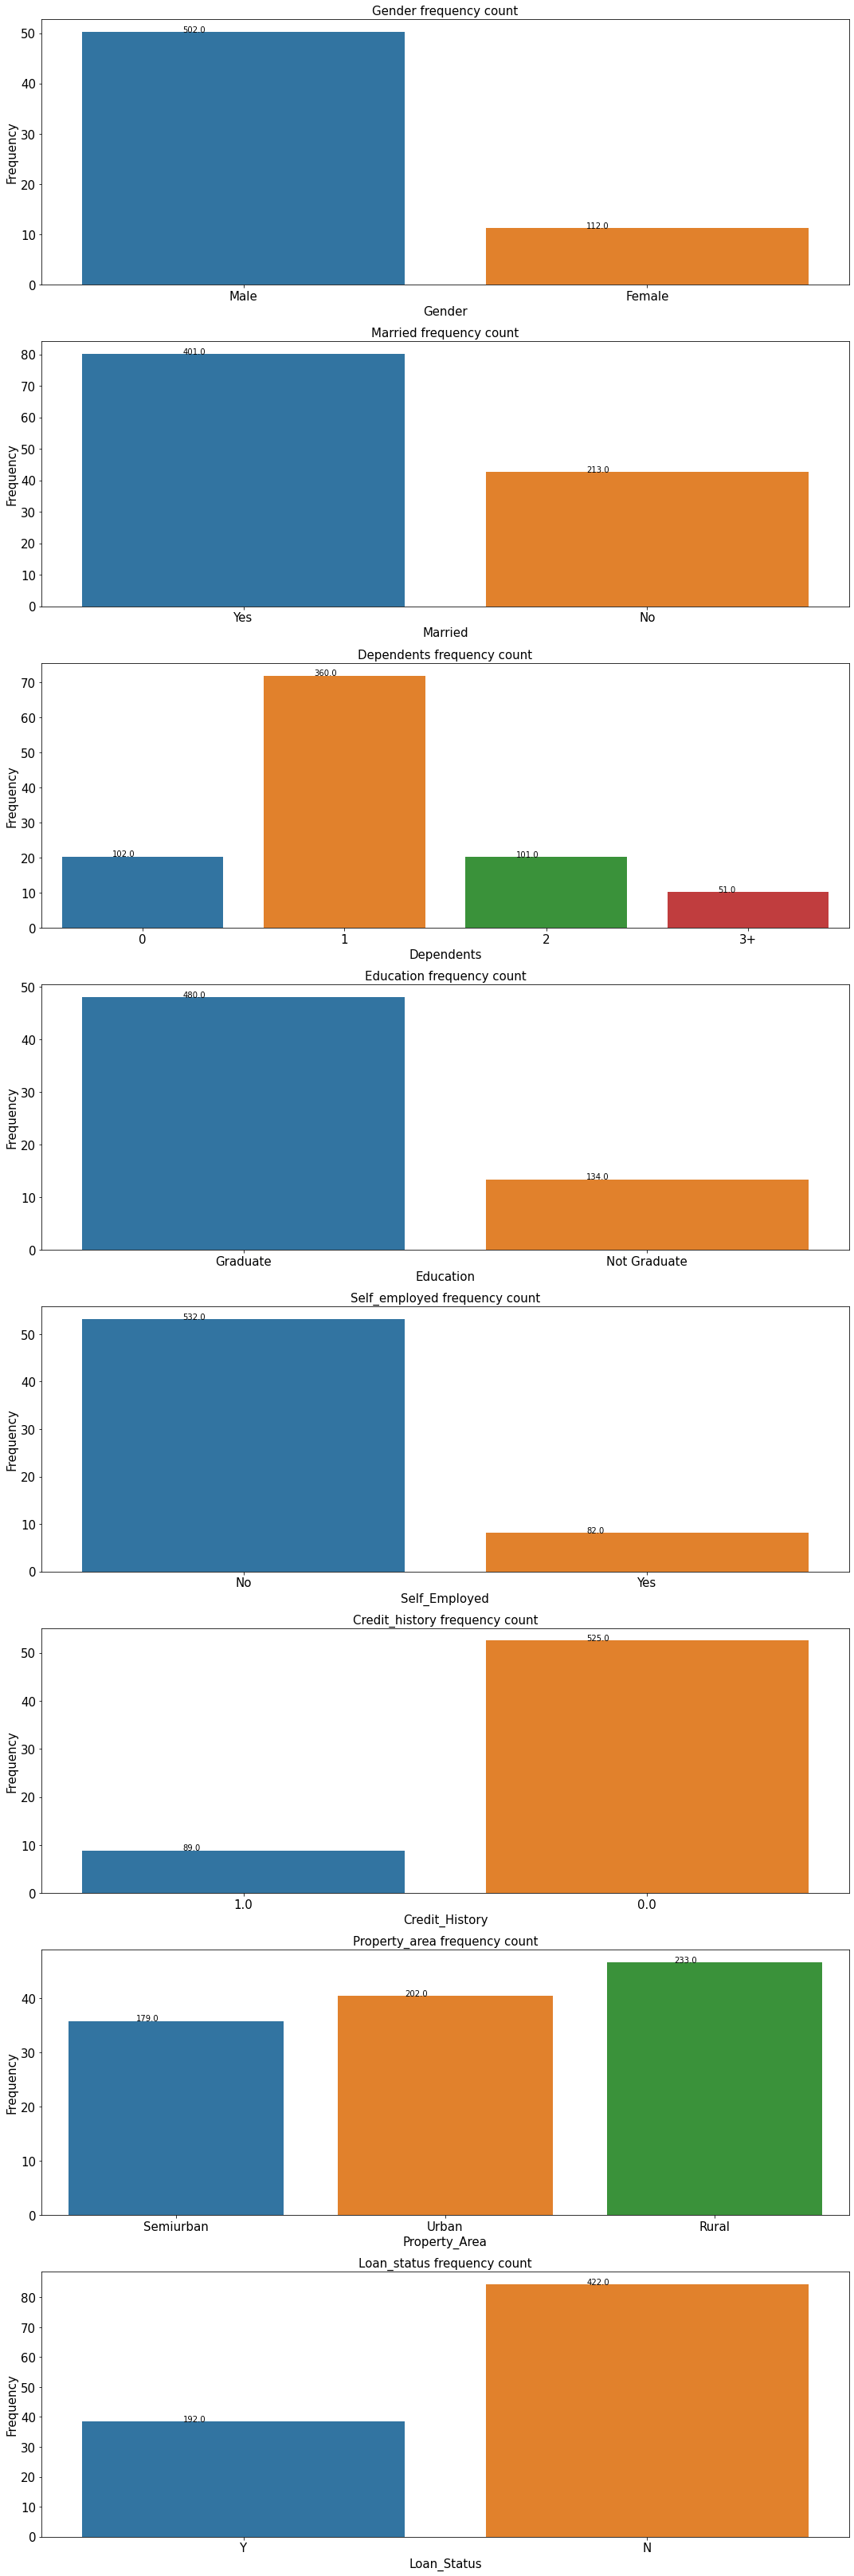

In [36]:
usual_countplots(new_df,['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area','Loan_Status'])

In [37]:
def detailed_countplots(df, hue, main, titlebeg = None):
    fig, axes = plt.subplots(nrows = len(hue), ncols = 1, figsize = (20,35))
    nums = range(len(hue))
    main_label = main.capitalize()
    if titlebeg == None:
        title = ''
        for c,k in enumerate(np.unique(df[main])):
            if c < len(np.unique(df[main])) - 1:
                title += k + ' and '
            else:
                title += k
    else:
        title = ''
        title += titlebeg
        for c,k in enumerate(np.unique(df[main])):
            if c < len(np.unique(df[main])) - 1:
                title += k + ' and '
            else:
                title += k
    title += '\ncountplots with different hues'
    for i,j in zip(nums, hue):
        ax = sns.countplot(x=main, data=df, hue = df[j], ax = axes[i])
        for p in ax.patches:
            ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
        axes[i].legend(loc = 'best', prop = {'size':16}).set_title(j.capitalize(), prop = {'size': 16})
        axes[i].set_xlabel(main_label, fontsize = 15)
        axes[i].set_ylabel('Frequency', fontsize = 16)
        axes[i].set_xticklabels(df[main].value_counts().index,Fontsize = 16)
        axes[i].set_yticklabels(np.arange(0,df[main].value_counts()[0],10), Fontsize = 15)
    plt.suptitle(title[:], fontsize = 65)
    plt.show()

<ipython-input-37-63d7aafeb3fe>:28: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axes[i].set_xticklabels(df[main].value_counts().index,Fontsize = 16)
<ipython-input-37-63d7aafeb3fe>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_yticklabels(np.arange(0,df[main].value_counts()[0],10), Fontsize = 15)
<ipython-input-37-63d7aafeb3fe>:29: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axes[i].set_yticklabels(np.arange(0,df[main].value_counts()[0],10), Fontsize = 15)
<ipython-input-37-63d7aafeb3fe>:28: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axes[i].set_xticklabels(df[main].value_counts().index,Fontsize = 16)
<ipython-input-37-63d7aafeb3fe>:29: UserWarning: FixedFormatter sho

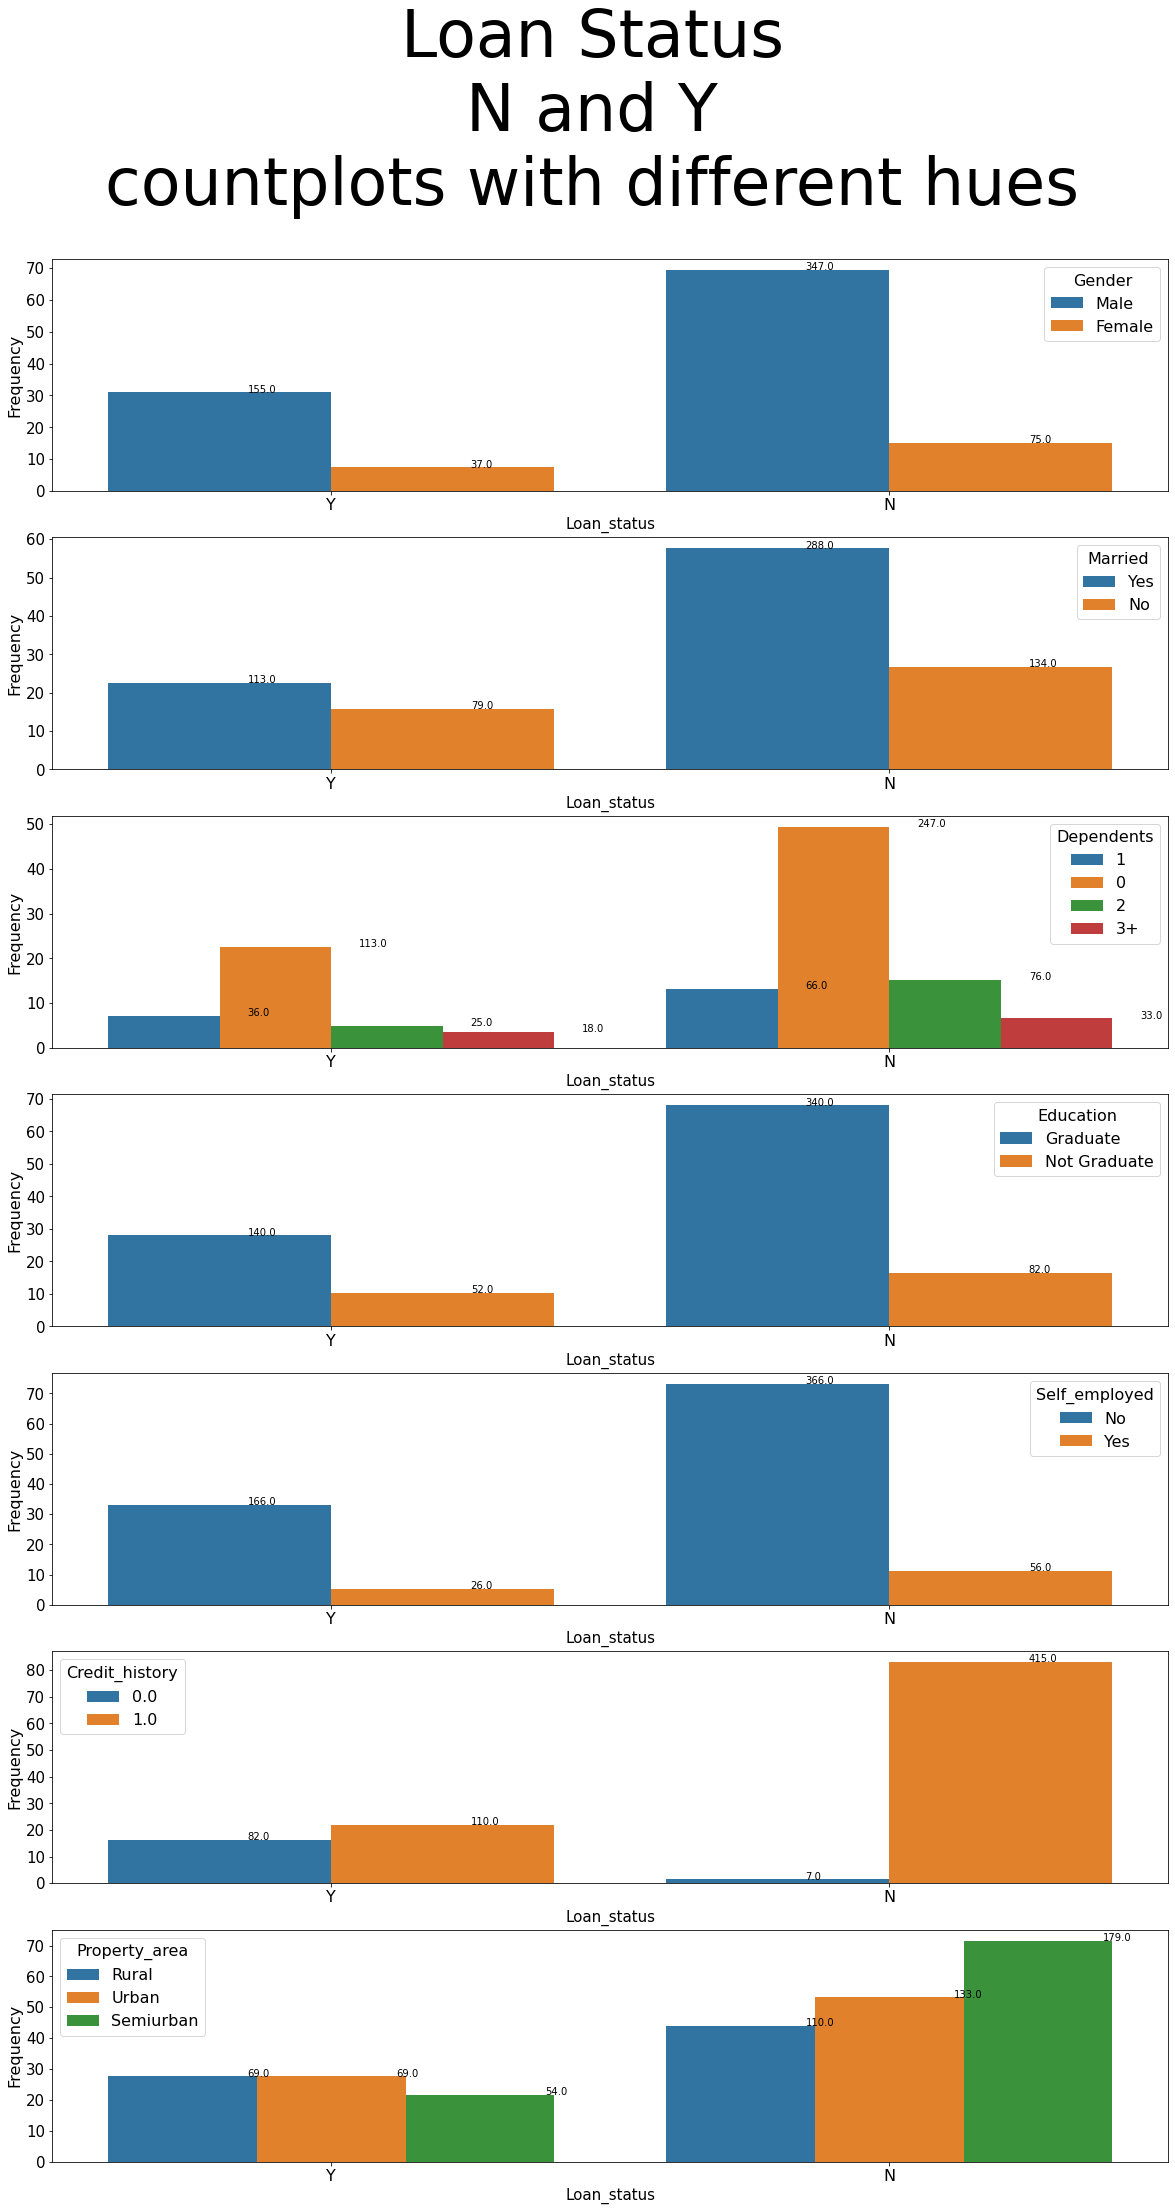

In [38]:
detailed_countplots(new_df,['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area'],'Loan_Status','Loan Status\n')

In [39]:
def cross(df,status,gender,others):
    tab = []
    for i,j in enumerate(others):
        tab.append(pd.crosstab(df[status],[df[gender],df[j]], rownames = [status], colnames = [gender,j]))
    return tab

In [40]:
tabs_1 = cross(new_df,'Loan_Status','Gender',['Married',
                                            'Dependents',
                                            'Education',
                                            'Self_Employed',
                                            'Credit_History',
                                            'Property_Area'])

In [41]:
tabs_2 = cross(new_df,'Loan_Status','Married',['Dependents',
                                            'Education',
                                            'Self_Employed',
                                            'Credit_History',
                                            'Property_Area'])

In [42]:
tabs_3 = cross(new_df,'Loan_Status','Dependents',['Education',
                                            'Self_Employed',
                                            'Credit_History',
                                            'Property_Area'])

In [43]:
tabs_3 = cross(new_df,'Loan_Status','Education',['Self_Employed',
                                            'Credit_History',
                                            'Property_Area'])

In [44]:
tabs_4 = cross(new_df,'Loan_Status','Self_Employed',['Credit_History',
                                            'Property_Area'])

In [45]:
tabs_5 = cross(new_df,'Loan_Status','Credit_History',['Property_Area'])

In [46]:
tabs = [tabs_1,tabs_2,tabs_3,tabs_4,tabs_5]

In [47]:
for i,tab in enumerate(tabs):
    print("Crosstab number ",i+1)
    for j,t in enumerate(tab):
        print(t)

Crosstab number  1
Gender      Female     Male     
Married         No Yes   No  Yes
Loan_Status                     
N               29   8   50  105
Y               51  24   83  264
Gender      Female           Male            
Dependents       0   1  2 3+    0   1   2  3+
Loan_Status                                  
N               27   6  2  2   86  30  23  16
Y               56  13  5  1  191  53  71  32
Gender        Female                  Male             
Education   Graduate Not Graduate Graduate Not Graduate
Loan_Status                                            
N                 31            6      109           46
Y                 61           14      279           68
Gender        Female     Male    
Self_Employed     No Yes   No Yes
Loan_Status                      
N                 31   6  135  20
Y                 66   9  300  47
Gender         Female     Male     
Credit_History    0.0 1.0  0.0  1.0
Loan_Status                        
N                  16  21   

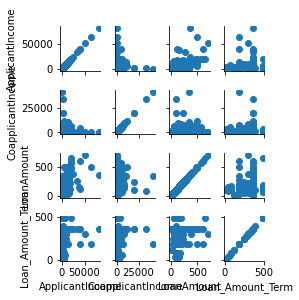

In [48]:
g = sns.PairGrid(new_df[nums], height=1)
g.map(plt.scatter)
plt.tight_layout()

In [49]:
def scat(df,data,target):
    fig, axes = plt.subplots(ncols = 1, nrows = len(data), figsize = (10,20))
    for i,j in enumerate(data):
        title = j.capitalize() + " versus " + target.capitalize()
        axes[i].scatter(df[j].values, df[target].values)
        axes[i].set_title(title)
    plt.show()

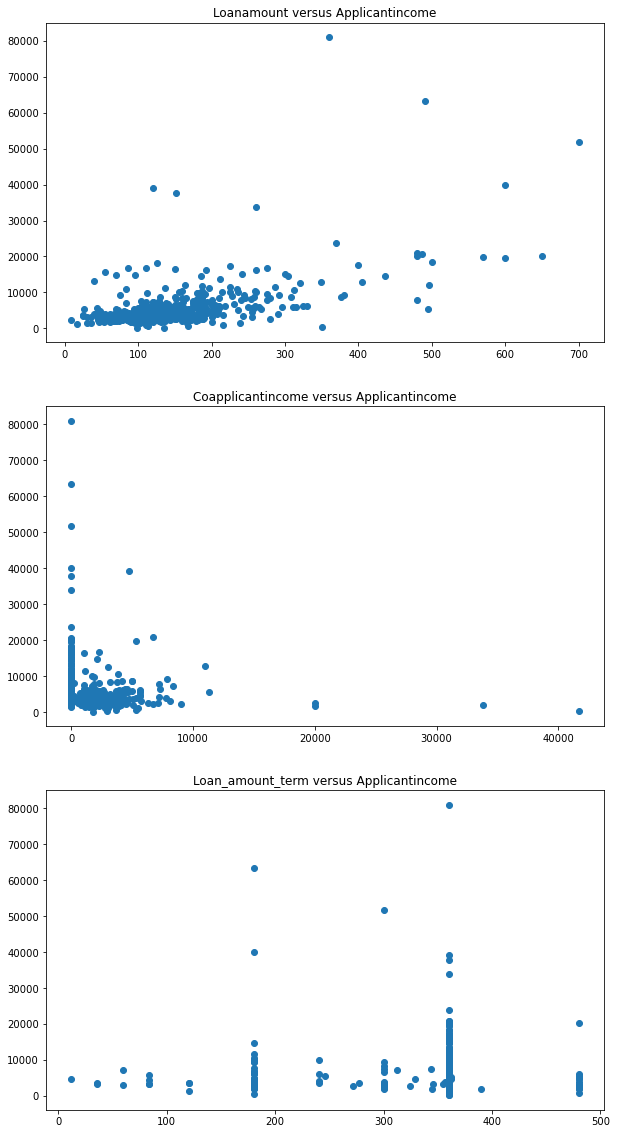

In [50]:
scat(new_df,['LoanAmount','CoapplicantIncome','Loan_Amount_Term'],'ApplicantIncome')

In [51]:
def scat_class(df,data,target, hues):
    fig, axes = plt.subplots(nrows = len(data), ncols = len(hues), figsize = (25,15))
    for i,j in enumerate(data):
        for z,c in enumerate(hues):
            for k,l in enumerate(np.unique(df[c])):
                x = df[df[c] == l]
                axes[i][z].scatter(x[j],x[target], label = l)
                axes[i][z].legend(loc = 'best', prop = {'size':12}).set_title(c.capitalize(), prop = {'size':12})
                axes[i][z].set_xticks(())
                axes[i][z].set_yticks(())
    plt.tight_layout()
    plt.show()

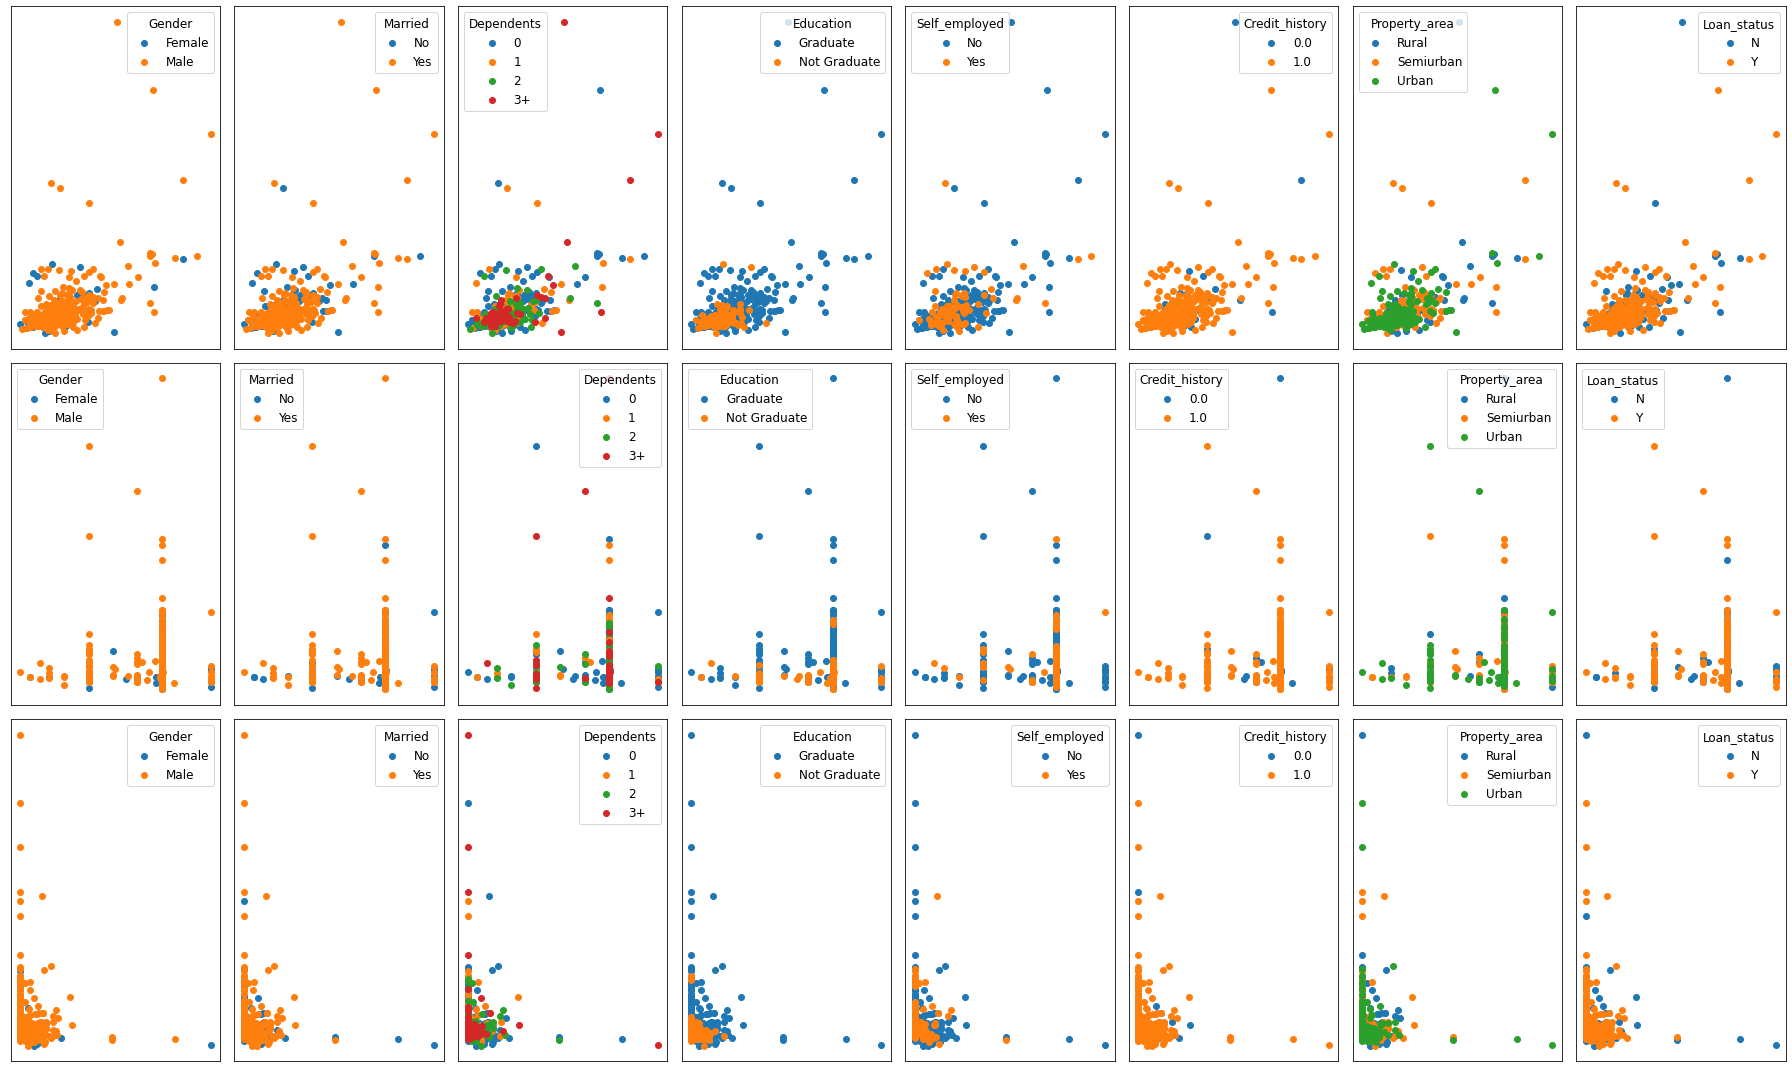

In [52]:
scat_class(new_df,['LoanAmount','Loan_Amount_Term',
                   'CoapplicantIncome'],
           'ApplicantIncome',
           ['Gender',
            'Married',
            'Dependents',
            'Education',
            'Self_Employed',
            'Credit_History',
            'Property_Area',
            'Loan_Status'])

In [53]:
hues = ['Gender',
        'Married',
        'Dependents',
        'Education',
        'Self_Employed',
        'Credit_History',
        'Property_Area',
        'Loan_Status']

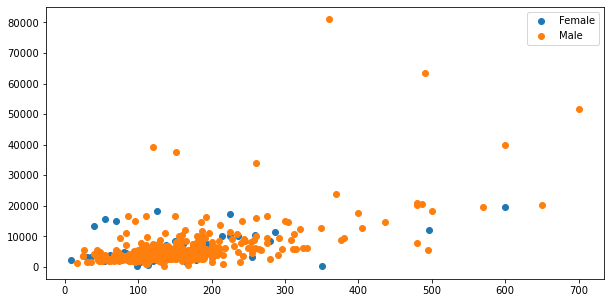

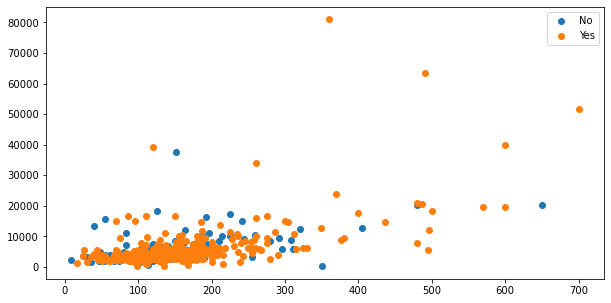

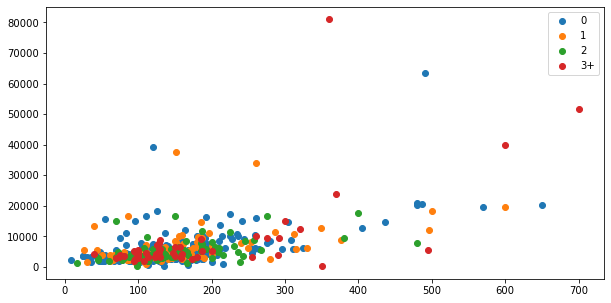

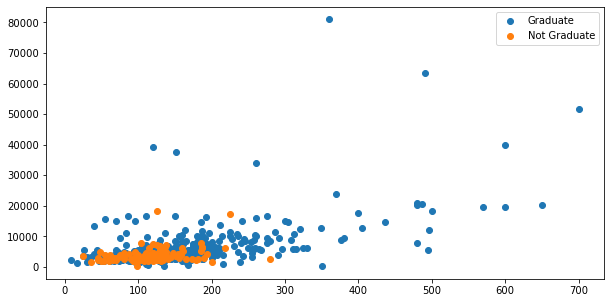

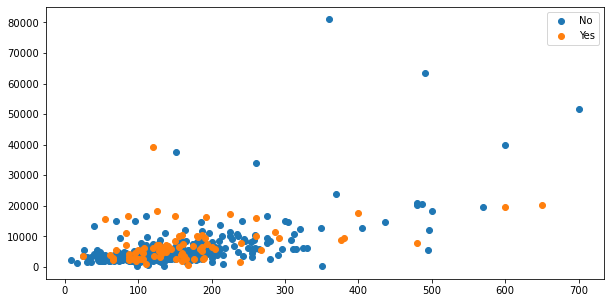

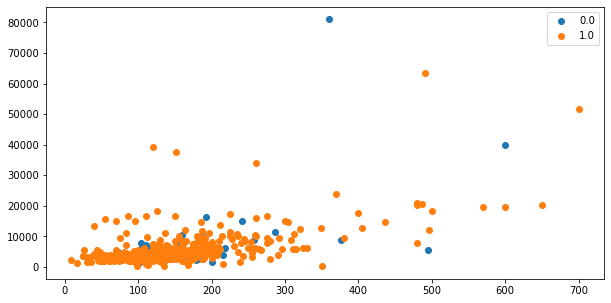

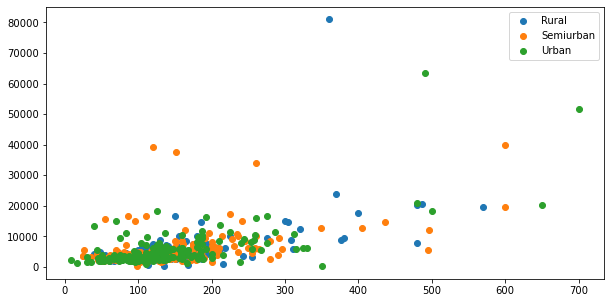

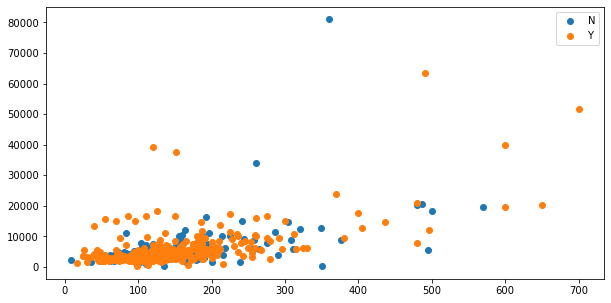

In [54]:
#closer look at loan amount vs applicant income scatterplots
for i,j in enumerate(hues):
    fig = plt.figure(figsize = (10,5))
    for z,c in enumerate(np.unique(new_df[j])):
        x = new_df[new_df[j] == c]
        plt.scatter(x['LoanAmount'],x['ApplicantIncome'], label = c)
        plt.legend(loc = 'best')
plt.show()

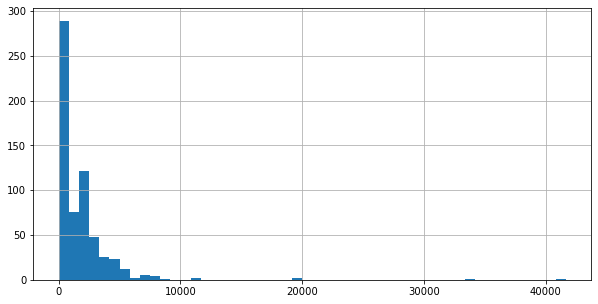

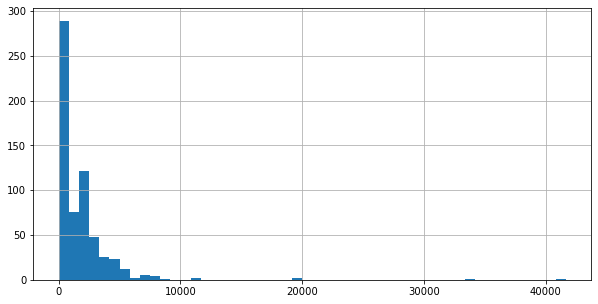

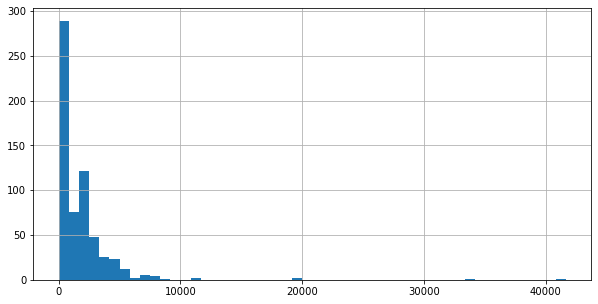

In [55]:
for i in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']:
    plt.figure(figsize=(10,5))
    new_df['CoapplicantIncome'].hist(bins = 50)
    plt.show()

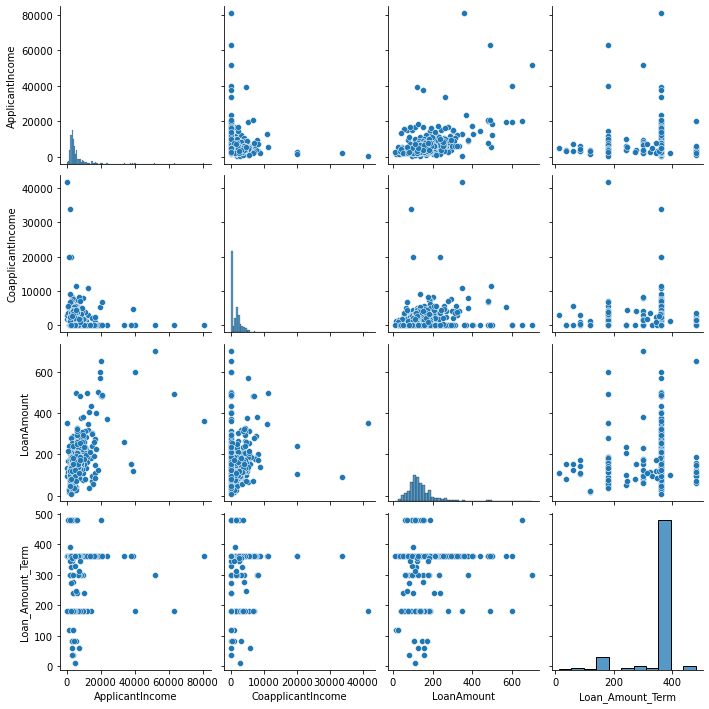

In [56]:
sns.pairplot(new_df,
             vars=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'])

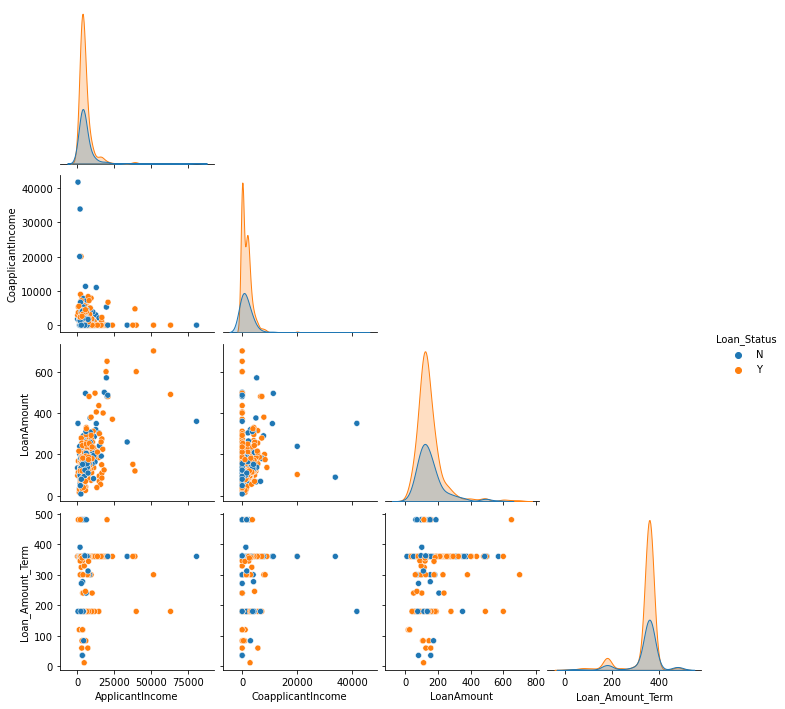

In [57]:
sns.pairplot(new_df,
             vars=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'],
             hue='Loan_Status',
             corner=True)

In [58]:
def outliers(df, num):
    perc = np.percentile(df[num], [0, 25, 50, 75, 100])
    iqr = perc[3] - perc[1]
    min_bound = perc[1] - iqr*1.5
    max_bound = perc[3] + iqr*1.5
    indexes = df.loc[(df[num] < min_bound) | (df[num] > max_bound), num].index
    df.loc[indexes, num] = max_bound
    return df

In [59]:
def gen_boxplots(df, nums):
    fig, axes = plt.subplots(nrows = 1, ncols = len(nums), figsize = (15,5))
    for i, num in enumerate(nums):
        sns.boxplot(df[num],
                   ax = axes[i],
                   showmeans = True,
                   meanprops = {"markersize":"15",
                               "markerfacecolor":"orange",
                               "markeredgecolor":"red"})
    plt.tight_layout()
    plt.show()

C:\Users\User2-NB\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User2-NB\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User2-NB\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User2-NB\anac

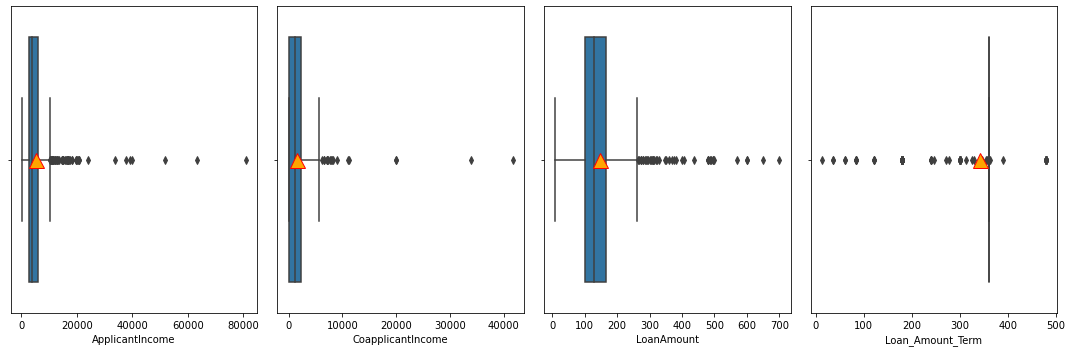

In [60]:
gen_boxplots(new_df, ['ApplicantIncome', 'CoapplicantIncome','LoanAmount', 'Loan_Amount_Term'])

In [61]:
for i in ['ApplicantIncome', 'CoapplicantIncome','LoanAmount']:
    new_df = outliers(new_df, i)

C:\Users\User2-NB\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User2-NB\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User2-NB\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User2-NB\anac

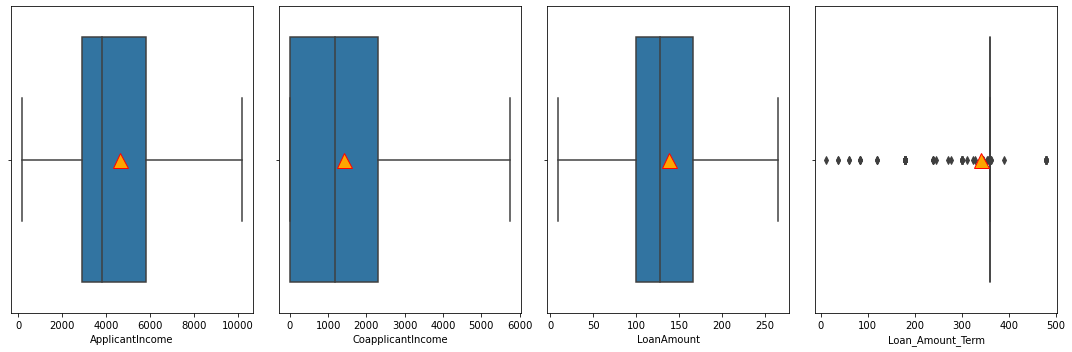

In [62]:
gen_boxplots(new_df, ['ApplicantIncome', 'CoapplicantIncome','LoanAmount', 'Loan_Amount_Term'])

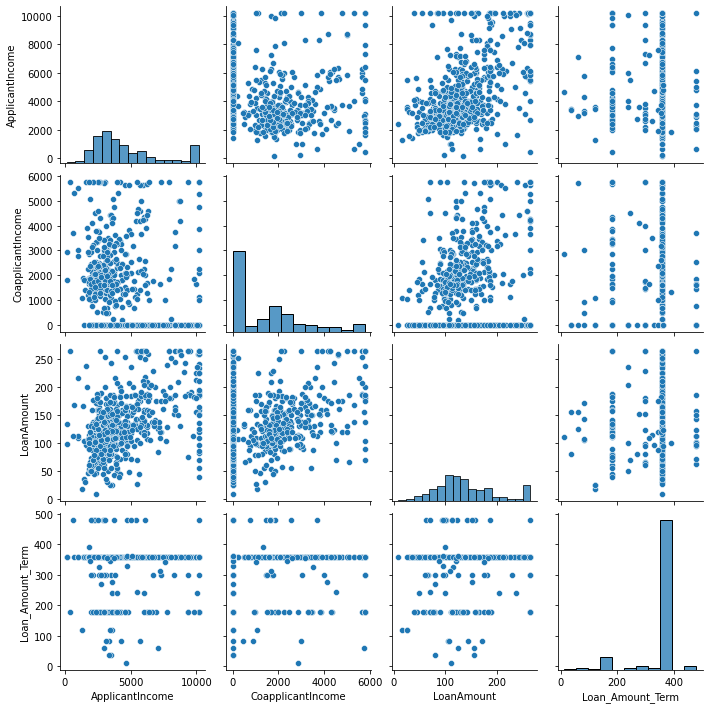

In [63]:
sns.pairplot(new_df,
             vars=['ApplicantIncome',
                   'CoapplicantIncome',
                   'LoanAmount',
                   'Loan_Amount_Term'])

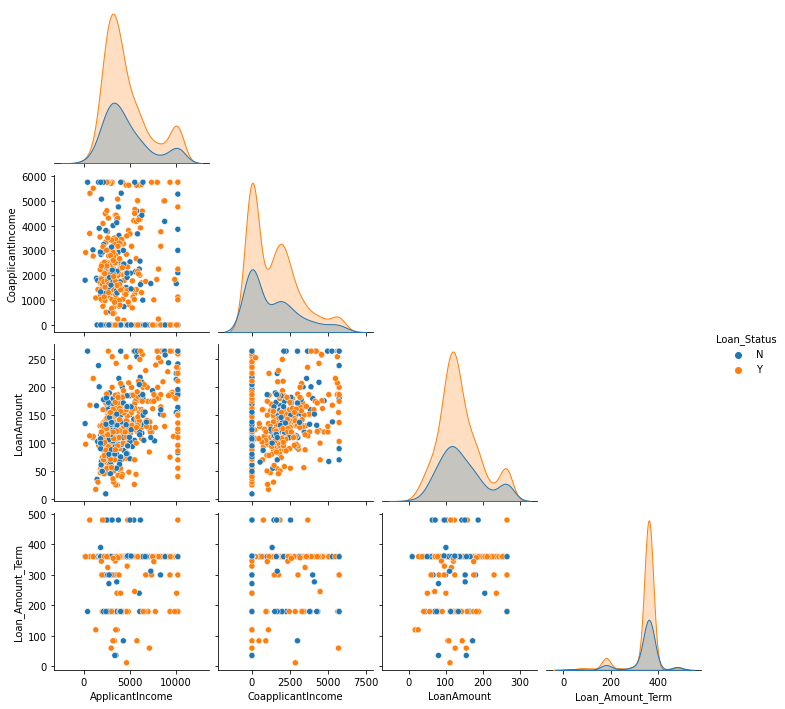

In [64]:
sns.pairplot(new_df,
             vars=['ApplicantIncome',
                   'CoapplicantIncome',
                   'LoanAmount',
                   'Loan_Amount_Term'],
             hue='Loan_Status',
             corner=True)

In [65]:
def classifier(x, y, model, ml_name=None):
    x_train, x_test, y_train, y_test = train_test_split(x.values , y, random_state = 42, test_size = 0.3)
    y_pred = model.predict(x_test)
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
    for i,j in enumerate(np.unique(y_pred)):
        axes[0].scatter(x_test[y_pred == j, 3], x_test[y_pred == j, 1], label = j)
    axes[0].legend(loc='best')
    for i,j in enumerate(np.unique(y_test)):
        axes[1].scatter(x_test[y_test == j, 3], x_test[y_test == j, 1], label = j)
    axes[1].legend(loc='best')
    axes[0].set_title('Predicted')
    axes[1].set_title('Original values')
    plt.tight_layout()
    plt.show()
    cm = confusion_matrix(y_pred, y_test)
    sns.heatmap(cm, annot = True).set(title = 'Confusion matrix')
    acc_score = accuracy_score(y_pred, y_test)
    f1 = f1_score(y_pred, y_test)
    scores = acc_score, f1
    print(ml)
    return pd.DataFrame(scores, columns = ['scores'], index = ['accuracy','f1_score'])

In [66]:
def cl_model(x, y, model, ml_name=None):
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.4)
    y_pred = model.predict(x_test)
    acs = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True)
    plt.title(f"{ml_name}\n{round(acs*100, 2)}%")
    return acs

In [67]:
def modelling(x, y, model):
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)
    y_pred = model.predict(x_test)
    acs = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_pred, y_test)
    plt.figure(figsize=(10, 5))
    sns.heatmap(cm ,annot=True)
    plt.title(f"{model}\n{round(acs*100, 2)}%")
    plt.title()
    fig, axes = plt.subplots(nrows=1, ncols=2, figisize=(10, 5))
    for i, j in enumerate(np.unique(y_pred)):
        axes[0].scatter(x_test[y_pred==j, 0], x_test[y_pred==j, 1])
    for z, p in enumerate(np.unique(y_test)):
        axes[i].scatter(x_test[y_test==p, 0], x_test[y_test==p, 1])
    axes[0].set_title("Predicted values")
    axes[1].set_title("Observed values")
    plt.tight_layout()
    plt.show()

In [68]:
new_df = encode(new_df)

In [69]:
new_df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [70]:
new_df.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,1,1,0,4583.0,1508.0,128.000,360.0,1.0,1,0
1,0,1,0,1,1,3000.0,0.0,66.000,360.0,1.0,0,1
2,0,1,0,0,0,2583.0,2358.0,120.000,360.0,1.0,0,1
3,0,0,0,1,0,6000.0,0.0,141.000,360.0,1.0,0,1
4,0,1,2,1,1,5417.0,4196.0,264.925,360.0,1.0,0,1


In [71]:
df_ml = new_df.copy()
ss = StandardScaler()
ss.fit(df_ml[nums])
df_ml[nums] = ss.transform(df_ml[nums])

In [72]:
x = df_ml.drop(['Loan_Status'], axis=1)
y = df_ml['Loan_Status']
xn = df_ml[nums]
xcl = df_ml[cat_cols[:-1]]

In [73]:
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
svc = SVC()
gnb = GaussianNB()

In [74]:
c = [0.5610655763463324,
     0.46449306333149487,
     0.2078607329993014,
     0.5953496750193594,
     0.892507990280132,
     0.04903691215755257,
     0.7835930130438709,
     0.5574836593839051,
     0.43803991914536067,
     0.763245854457818,
     0.938726819939586,
     0.7310590978981216,
     0.46125157872500033,
     0.3328681192137717,
     0.032751477409090346]

In [75]:
knn_params = {
    'n_neighbors': range(1,30),
    'weights': ['uniform','distance'],
    'algorithm': ['auto','ball_tree','kd_tree','brute']
}
svc_params = {
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'gamma': ['scale'],
    'C': c
}
dtc_params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [x for x in range(10)]
}
rfc_params = {
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [x for x in range(10)]
}

In [76]:
grid_knn = GridSearchCV(knn,
                       param_grid=knn_params,
                       scoring='accuracy',
                       cv = 10,
                       verbose = 1)
grid_svc = GridSearchCV(svc,
                       param_grid=svc_params,
                       scoring='accuracy',
                       cv = 10,
                       verbose = 1)
grid_dtc = GridSearchCV(dtc,
                       param_grid=dtc_params,
                       scoring='accuracy',
                       cv = 10,
                       verbose = 1)
grid_rfc = GridSearchCV(rfc,
                       param_grid=rfc_params,
                       scoring='accuracy',
                       cv = 10,
                       verbose = 1)

In [77]:
all_knn = GridSearchCV(knn, param_grid=knn_params)
all_svc = GridSearchCV(svc, param_grid=svc_params)
all_dtc = GridSearchCV(dtc, param_grid=dtc_params)
all_rfc = GridSearchCV(rfc, param_grid=rfc_params)
all_gnb = GaussianNB()
num_knn = GridSearchCV(knn, param_grid=knn_params)
num_svc = GridSearchCV(svc, param_grid=svc_params)
num_dtc = GridSearchCV(dtc, param_grid=dtc_params)
num_rfc = GridSearchCV(rfc, param_grid=rfc_params)
num_gnb = GaussianNB()
cl_knn = GridSearchCV(knn, param_grid=knn_params)
cl_svc = GridSearchCV(svc, param_grid=svc_params)
cl_dtc = GridSearchCV(dtc, param_grid=dtc_params)
cl_rfc = GridSearchCV(rfc, param_grid=rfc_params)
cl_gnb = GaussianNB()
hb_knn = GridSearchCV(knn, param_grid=knn_params)
hb_svc = GridSearchCV(svc, param_grid=svc_params)
hb_dtc = GridSearchCV(dtc, param_grid=dtc_params)
hb_rfc = GridSearchCV(rfc, param_grid=rfc_params)
hb_gnb = GaussianNB()

In [78]:
grids_all = [all_knn, all_svc, all_dtc, all_rfc, all_gnb]
grids_num = [num_knn, num_svc, num_dtc, num_rfc, num_gnb]
grids_cl = [cl_knn, cl_svc, cl_dtc, cl_rfc, cl_gnb]
grids_hb = [hb_knn, hb_svc, hb_dtc, hb_rfc, hb_gnb]
mls = [knn, svc, dtc, rfc, gnb]

<AxesSubplot:>

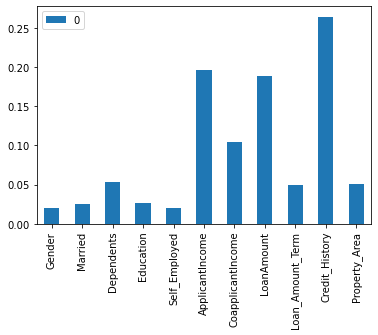

In [79]:
rfc1 = rfc
rfc1.fit(x, y)
importance = rfc1.feature_importances_
importance = pd.DataFrame(importance, index=x.columns)
importance.plot.bar()

In [80]:
xh = df_ml[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History']]

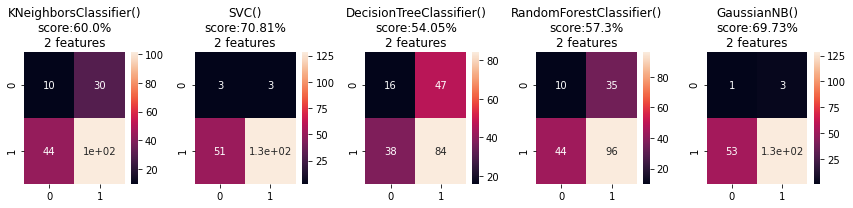

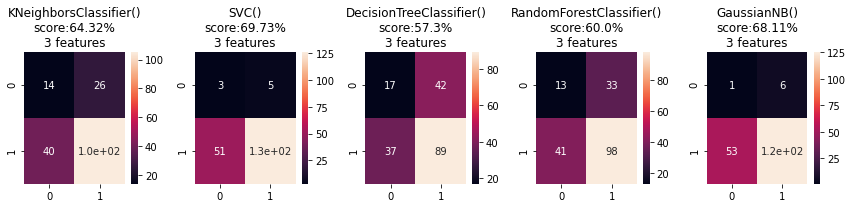

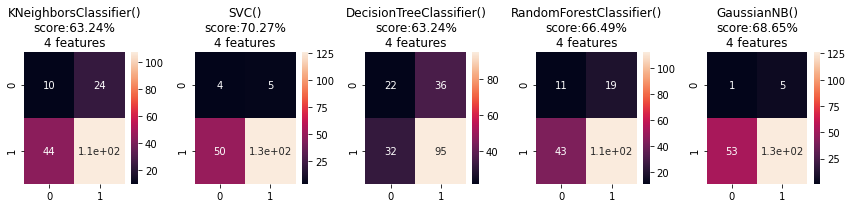

Best number of numeric features for modelling: 4 features
With a mean score of: 66.38%


In [81]:
num_sc = dict()
for i in range(2, len(nums)+1):
    fs = SelectKBest(score_func=f_regression, k=i)
    fs.fit(xn, y)
    x_selected = fs.transform(xn)
    ss = StandardScaler()
    ss.fit(x_selected)
    x_selected = ss.transform(x_selected)
    x_train, x_test, y1_train, y1_test = train_test_split(x_selected, y, random_state=42, test_size=0.3)
    fig, axes = plt.subplots(nrows=1, ncols=len(mls), figsize=(12,3))
    scores = []
    for j, ml in enumerate(mls):
        ml.fit(x_train, y1_train)
        pred = ml.predict(x_test)
        cm = confusion_matrix(pred, y1_test)
        acs = accuracy_score(pred, y1_test)
        sns.heatmap(cm, annot=True, ax=axes[j])
        axes[j].set_title(f"{ml}\nscore:{round(acs*100,2)}%\n{i} features")
        scores.append(acs)
    num_sc[f"{i} features"] = np.mean(scores)
    plt.tight_layout()
    plt.show()
best_num = max(num_sc.items(), key=operator.itemgetter(1))[0]
print(f"Best number of numeric features for modelling: {best_num}")
print(f"With a mean score of: {round(num_sc[best_num]*100, 2)}%")

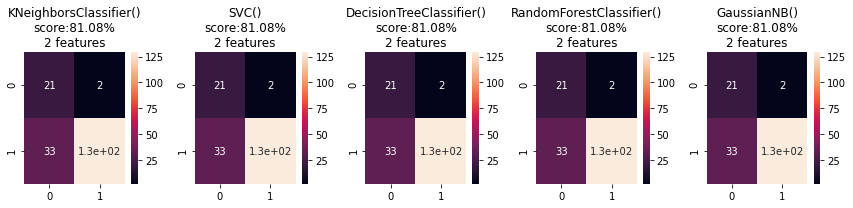

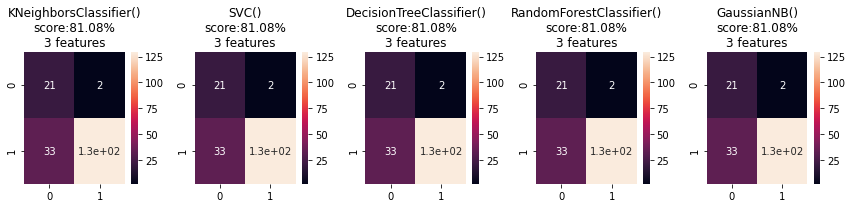

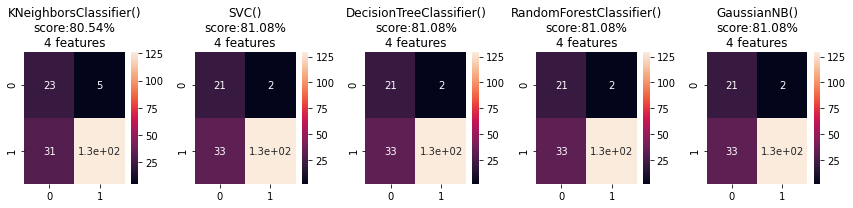

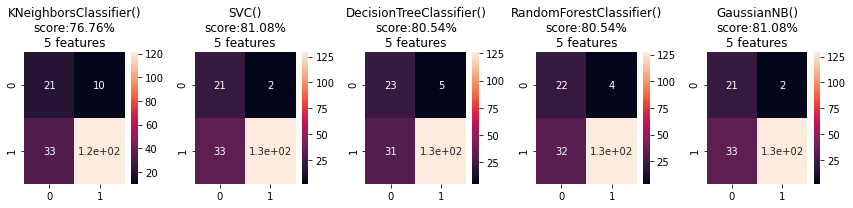

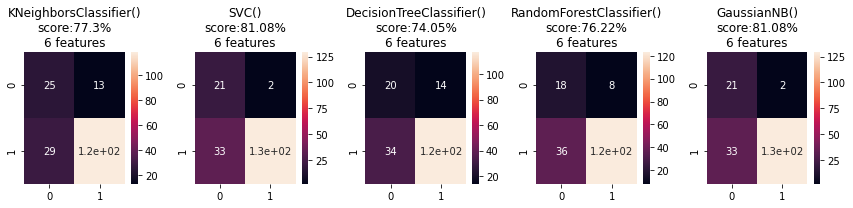

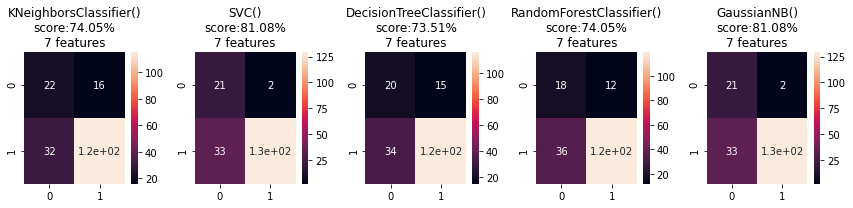

Best number of class features for modelling: 2
With a mean score of: 81.08%


In [82]:
cat_select = cat_cols[:-1]
cl_sc = dict()
for i in range(2, len(cat_select)+1):
    fs = SelectKBest(score_func=f_classif, k=i)
    fs.fit(xcl, y)
    x_selected = fs.transform(xcl)
    x_train, x_test, y1_train, y1_test = train_test_split(x_selected, y, random_state=42, test_size=0.3)
    fig, axes = plt.subplots(nrows=1, ncols=len(mls), figsize=(12,3))
    scores = []
    for j, ml in enumerate(mls):
        ml.fit(x_train, y1_train)
        pred = ml.predict(x_test)
        cm = confusion_matrix(pred, y1_test)
        acs = accuracy_score(pred, y1_test)
        sns.heatmap(cm, annot=True, ax=axes[j])
        axes[j].set_title(f"{ml}\nscore:{round(acs*100,2)}%\n{i} features")
        scores.append(acs)
    cl_sc[i] = np.mean(scores)
    plt.tight_layout()
    plt.show()
best_cl = max(cl_sc.items(), key=operator.itemgetter(1))[0]
print(f"Best number of class features for modelling: {best_cl}")
print(f"With a mean score of: {round(cl_sc[best_cl]*100, 2)}%")

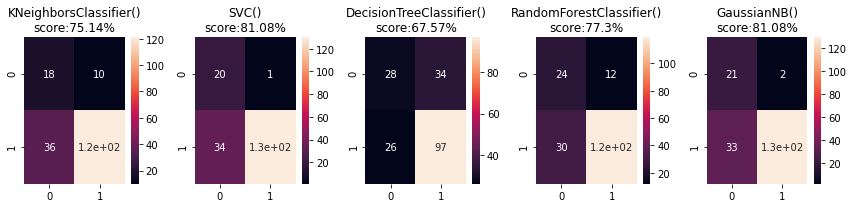

Mean score is 0.8108108108108109


In [83]:
all_sc = []
for i in range(1):
    x_train, x_test, y1_train, y1_test = train_test_split(x, y, random_state=42, test_size=0.3)
    fig, axes = plt.subplots(nrows=1, ncols=len(mls), figsize=(12,3))
    for j, ml in enumerate(mls):
        ml.fit(x_train, y1_train)
        pred = ml.predict(x_test)
        cm = confusion_matrix(pred, y1_test)
        acs = accuracy_score(pred, y1_test)
        sns.heatmap(cm, annot=True, ax=axes[j])
        axes[j].set_title(f"{ml}\nscore:{round(acs*100,2)}%")
        all_sc.append(acs)
    plt.tight_layout()
    plt.show()
print(f"Mean score is {np.mean(acs)}")

In [84]:
xn_train, xn_test, yn_train, yn_test = train_test_split(xn, y, random_state=42, test_size=0.3)

In [85]:
for grid, ml in zip(grids_num, mls):
    start = time.time()
    grid.fit(xn_train, yn_train)
    end = time.time()
    print(f"Time needed for GridSearchCV for {ml}: {end-start}")

Time needed for GridSearchCV for KNeighborsClassifier(): 9.83591103553772
Time needed for GridSearchCV for SVC(): 3.5807390213012695


C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 306, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must b

Time needed for GridSearchCV for DecisionTreeClassifier(): 1.0885977745056152
Time needed for GridSearchCV for RandomForestClassifier(): 49.82906985282898
Time needed for GridSearchCV for GaussianNB(): 0.0030112266540527344


C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\User2-NB\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\User2-NB\anaconda3\lib\

In [86]:
for grid in grids_num[:-1]:
    print(grid.best_params_)

{'algorithm': 'auto', 'n_neighbors': 23, 'weights': 'uniform'}
{'C': 0.2078607329993014, 'gamma': 'scale', 'kernel': 'rbf'}
{'criterion': 'entropy', 'max_depth': 4, 'splitter': 'best'}
{'criterion': 'entropy', 'max_depth': 3, 'max_features': 'log2'}


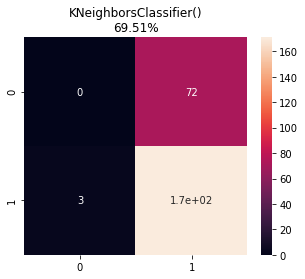

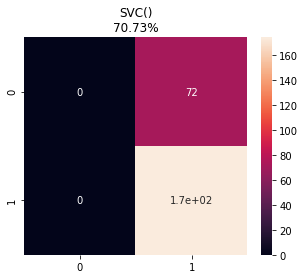

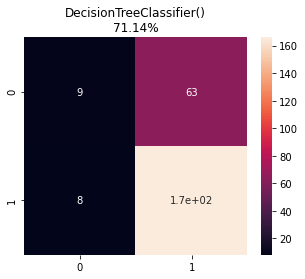

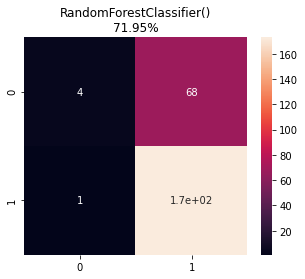

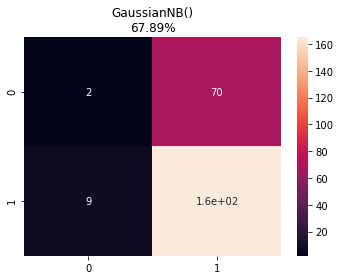

In [87]:
num_score = dict()
for grid, ml in zip(grids_num, mls):
    plt.figure(figsize=(5,4))
    num_score[ml] = cl_model(xn, y, grid, ml)
plt.tight_layout()
plt.show()

In [88]:
sorted(num_score.items(), key=operator.itemgetter(1))[-3:]

[(SVC(), 0.7073170731707317),
 (DecisionTreeClassifier(), 0.7113821138211383),
 (RandomForestClassifier(), 0.7195121951219512)]

In [89]:
fs_cl = SelectKBest(score_func=f_classif, k=best_cl)
fs_cl.fit(xcl, y)
x_cl = fs_cl.transform(xcl)

In [90]:
xc_train, xc_test, yc_train, yc_test = train_test_split(xcl, y, random_state=42, test_size=0.3)

In [91]:
for grid, ml in zip(grids_cl, mls):
    start = time.time()
    grid.fit(xc_train, yc_train)
    end = time.time()
    print(f"Time required to fit GridSearchCV for {ml}: {end-start}")

Time required to fit GridSearchCV for KNeighborsClassifier(): 10.281171798706055
Time required to fit GridSearchCV for SVC(): 3.2855303287506104


C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 306, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must b

Time required to fit GridSearchCV for DecisionTreeClassifier(): 1.0107173919677734
Time required to fit GridSearchCV for RandomForestClassifier(): 46.69947814941406
Time required to fit GridSearchCV for GaussianNB(): 0.003487110137939453


C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\User2-NB\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\User2-NB\anaconda3\lib\

In [92]:
for grid in grids_cl[:-1]:
    print(grid.best_params_)

{'algorithm': 'brute', 'n_neighbors': 12, 'weights': 'uniform'}
{'C': 0.5610655763463324, 'gamma': 'scale', 'kernel': 'rbf'}
{'criterion': 'gini', 'max_depth': 1, 'splitter': 'best'}
{'criterion': 'entropy', 'max_depth': 7, 'max_features': 'log2'}


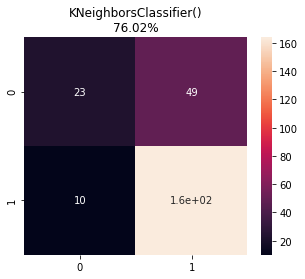

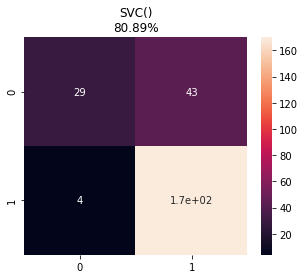

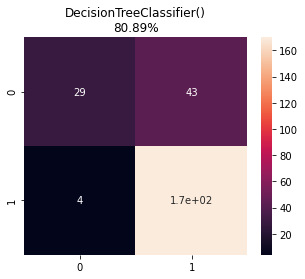

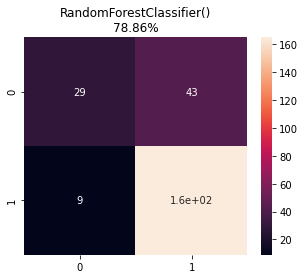

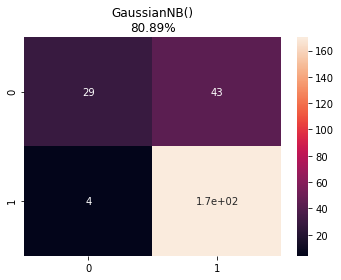

In [93]:
cl_score = dict()
for grid, ml in zip(grids_cl, mls):
    plt.figure(figsize=(5, 4))
    cl_score[ml] = cl_model(xcl, y, grid, ml)
plt.tight_layout()
plt.show()

In [94]:
sorted(cl_score.items(), key=operator.itemgetter(1))[-3:]

[(SVC(), 0.8089430894308943),
 (DecisionTreeClassifier(), 0.8089430894308943),
 (GaussianNB(), 0.8089430894308943)]

In [95]:
xh

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History
0,-0.013767,0.054395,-0.173842,1.0
1,-0.652632,-0.874587,-1.261178,1.0
2,-0.820924,0.578025,-0.314143,1.0
3,0.558104,-0.874587,0.054148,1.0
4,0.322818,1.710299,2.227504,1.0
...,...,...,...,...
609,-0.576355,0.725874,-0.314143,1.0
610,0.357526,1.891413,-1.191027,1.0
611,0.204569,-0.874587,-0.243993,0.0
612,-0.765634,-0.874587,-1.015651,0.0


In [96]:
xh_train, xh_test, yh_train, yh_test = train_test_split(xh.values, y, random_state=42, test_size=0.3)

In [97]:
for grid, ml in zip(grids_hb, mls):
    start = time.time()
    grid.fit(xh_train, yh_train)
    end = time.time()
    print(f"Time required to fit GridSearchCV for {ml} model: {end-start}")

Time required to fit GridSearchCV for KNeighborsClassifier() model: 5.339905738830566
Time required to fit GridSearchCV for SVC() model: 2.801877498626709


C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 306, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must b

Time required to fit GridSearchCV for DecisionTreeClassifier() model: 0.36524534225463867
Time required to fit GridSearchCV for RandomForestClassifier() model: 45.686426401138306
Time required to fit GridSearchCV for GaussianNB() model: 0.0010051727294921875


C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\User2-NB\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\User2-NB\anaconda3\lib\

In [98]:
for grid in grids_hb[:-1]:
    print(grid.best_params_)

{'algorithm': 'auto', 'n_neighbors': 16, 'weights': 'uniform'}
{'C': 0.892507990280132, 'gamma': 'scale', 'kernel': 'rbf'}
{'criterion': 'gini', 'max_depth': 1, 'splitter': 'best'}
{'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto'}


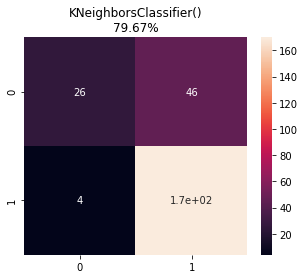

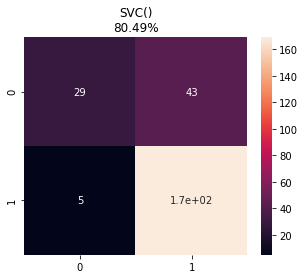

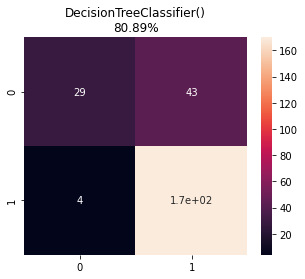

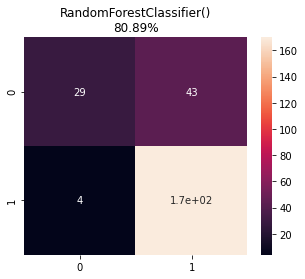

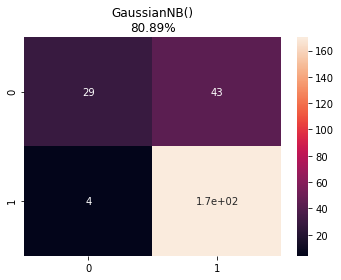

In [99]:
hb_score = dict()
for grid, ml in zip(grids_hb, mls):
    plt.figure(figsize=(5, 4))
    hb_score[ml] = cl_model(xh.values, y, grid, ml)
plt.tight_layout()
plt.show()

In [100]:
sorted(hb_score.items(), key=operator.itemgetter(1))[-3:]

[(DecisionTreeClassifier(), 0.8089430894308943),
 (RandomForestClassifier(), 0.8089430894308943),
 (GaussianNB(), 0.8089430894308943)]

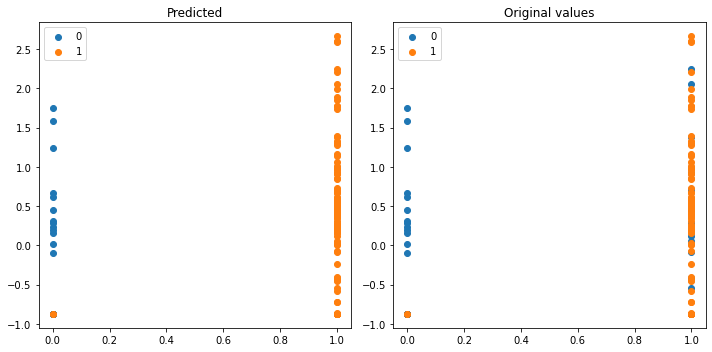

KNeighborsClassifier()
           scores
accuracy  0.80000
f1_score  0.87372


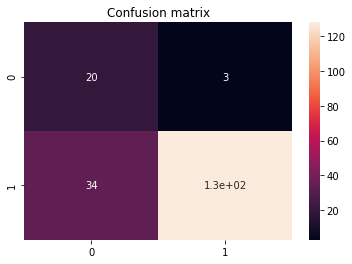

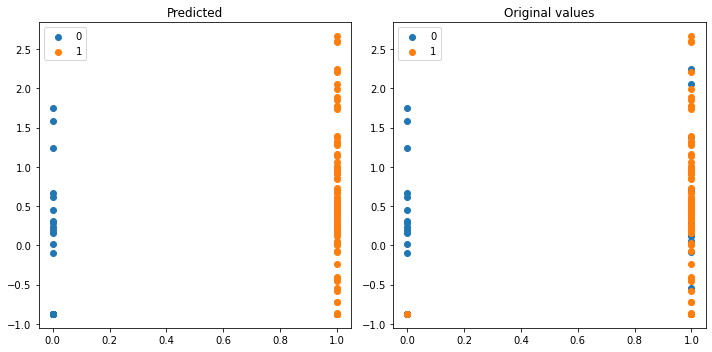

SVC()
            scores
accuracy  0.805405
f1_score  0.876712


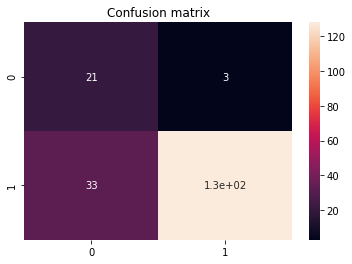

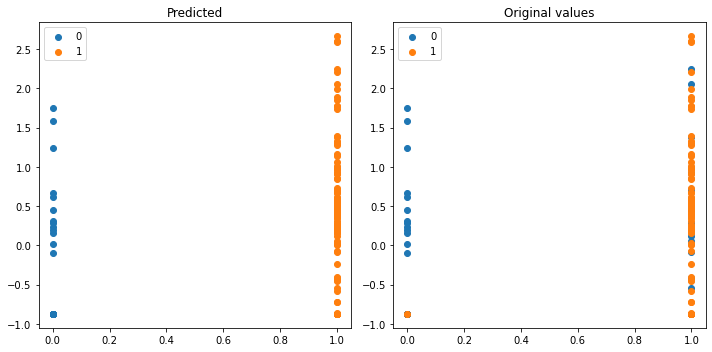

DecisionTreeClassifier()
            scores
accuracy  0.810811
f1_score  0.880546


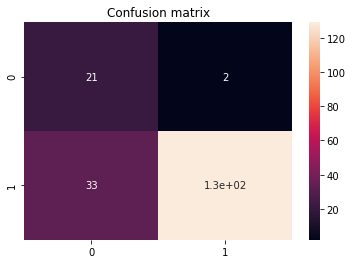

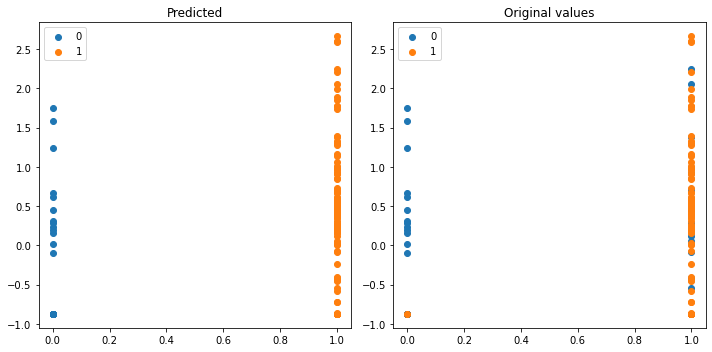

RandomForestClassifier()
            scores
accuracy  0.810811
f1_score  0.880546


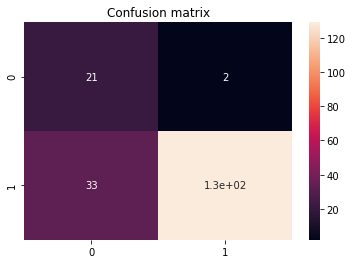

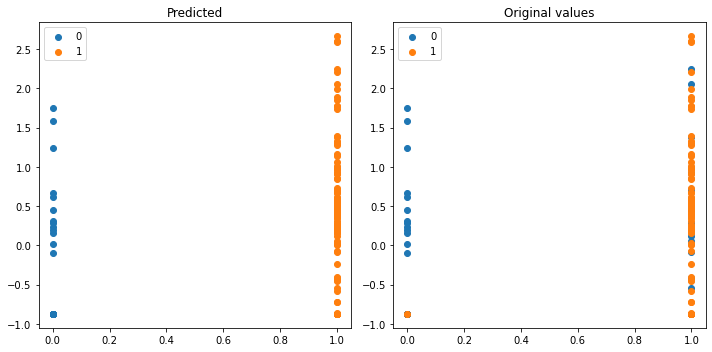

GaussianNB()
            scores
accuracy  0.810811
f1_score  0.880546


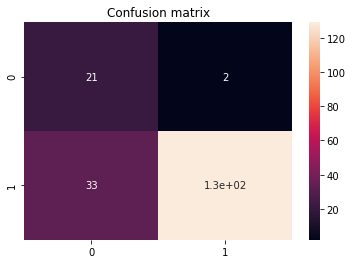

In [101]:
for grid, ml in zip(grids_hb, mls):
    print(classifier(xh, y, grid))

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)

In [103]:
for grid, ml in zip(grids_all, mls):
    start = time.time()
    grid.fit(x_train, y_train)
    end = time.time()
    print(f"Time required to fit a GridSearch model for {ml} model: {end-start}")

Time required to fit a GridSearch model for KNeighborsClassifier() model: 9.991087913513184
Time required to fit a GridSearch model for SVC() model: 3.5795395374298096


C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 306, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must b

Time required to fit a GridSearch model for DecisionTreeClassifier() model: 1.0957891941070557
Time required to fit a GridSearch model for RandomForestClassifier() model: 48.05750298500061
Time required to fit a GridSearch model for GaussianNB() model: 0.0030035972595214844


C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\User2-NB\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\User2-NB\anaconda3\lib\

In [104]:
for grid in grids_all[:-1]:
    print(grid.best_params_)

{'algorithm': 'auto', 'n_neighbors': 4, 'weights': 'distance'}
{'C': 0.5610655763463324, 'gamma': 'scale', 'kernel': 'rbf'}
{'criterion': 'gini', 'max_depth': 1, 'splitter': 'best'}
{'criterion': 'gini', 'max_depth': 9, 'max_features': 'sqrt'}


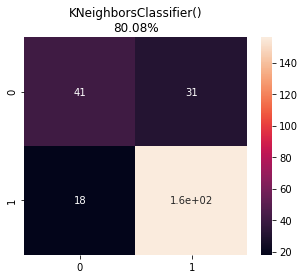

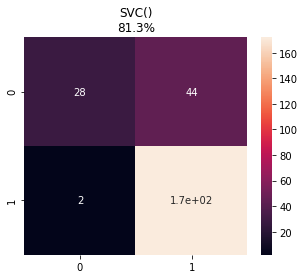

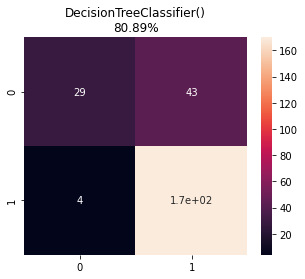

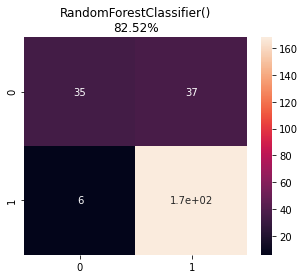

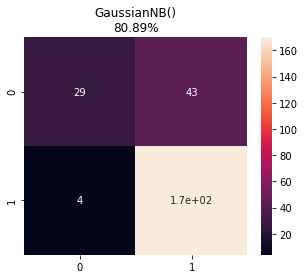

In [105]:
all_score = dict()
for grid, ml in zip(grids_all, mls):
    plt.figure(figsize=(5, 4))
    all_score[ml] = cl_model(x, y, grid, ml)

In [106]:
all_best = sorted(all_score.items(), key=operator.itemgetter(1))[-3:]
num_best = sorted(num_score.items(), key=operator.itemgetter(1))[-3:]
cl_best = sorted(cl_score.items(), key=operator.itemgetter(1))[-3:]
hb_best = sorted(hb_score.items(), key=operator.itemgetter(1))[-3:]

In [107]:
mean_scores = dict()
inputs = ['all_features', 'numerical', 'class', 'hybrid']
score_dicts = [all_best, num_best, cl_best, hb_best]
for dct, inp in zip(score_dicts, inputs):
    sc = []
    for i in dct:
        sc.append(i[1])
    mean_scores[inp] = np.mean(sc)

In [108]:
sorted(mean_scores.items(), key=operator.itemgetter(1))

[('numerical', 0.7127371273712737),
 ('class', 0.8089430894308943),
 ('hybrid', 0.8089430894308943),
 ('all_features', 0.8157181571815718)]

In [109]:
all_best

[(GaussianNB(), 0.8089430894308943),
 (SVC(), 0.8130081300813008),
 (RandomForestClassifier(), 0.8252032520325203)]

In [110]:
def model_visualise(x, y, grid, ml, x_axis, y_axis, param):
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)
    y_pred = grid.predict(x_test)
    score = accuracy_score(y_test, y_pred)
    score = score*100
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    for i, j in enumerate(np.unique(y_pred)):
        axes[0].scatter(x_test[y_pred==j, x_axis], x_test[y_pred==j, y_axis])
    for i, j in enumerate(np.unique(y_test)):
        axes[1].scatter(x_test[y_test==j, x_axis], x_test[y_test==j, y_axis])
    axes[1].set_title("Observed values")
    if param=='yes':
        axes[0].set_title(f"Predicted using {ml}\nwith {grid.best_params_}\nscore:{round(score, 2)}%")
    else:
        axes[0].set_title(f"Predicted using {grid}\nscore{round(score, 2)}%")
    plt.tight_layout()
    plt.show()

C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


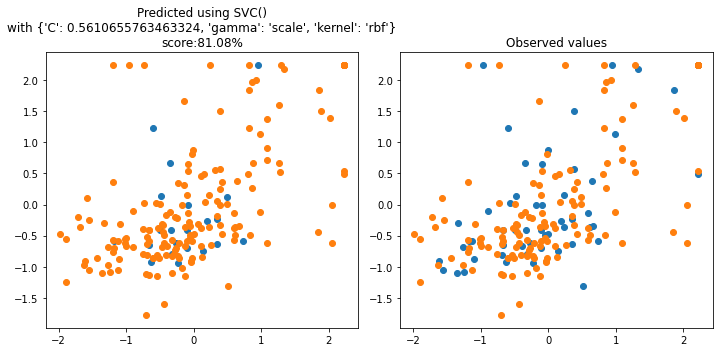

C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


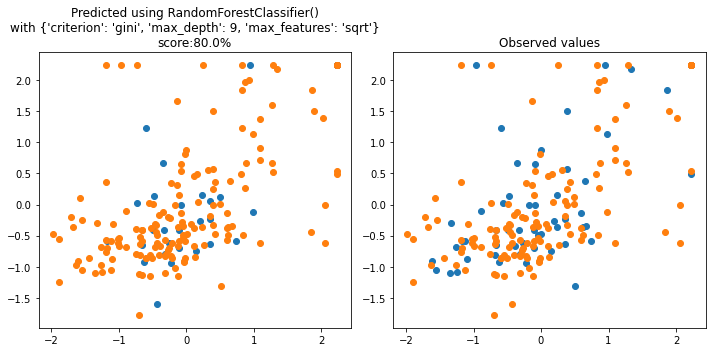

C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


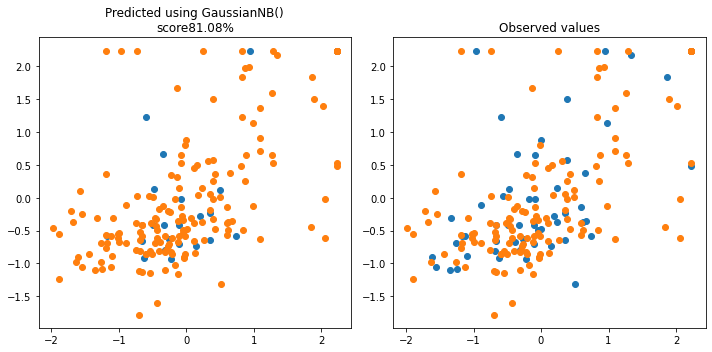

In [111]:
model_visualise(x.values, y, grids_all[1], mls[1], 7, 5, 'yes')
model_visualise(x.values, y, grids_all[3], mls[3], 7, 5, 'yes')
model_visualise(x.values, y, grids_all[4], mls[4], 7, 5, 'no')

In [113]:
print(f"{mls[1]} params: {grids_all[1].best_params_}")
print(f"{mls[3]} params: {grids_all[3].best_params_}")
print(f"{grids_all[4]} with no params specified")

SVC() params: {'C': 0.5610655763463324, 'gamma': 'scale', 'kernel': 'rbf'}
RandomForestClassifier() params: {'criterion': 'gini', 'max_depth': 9, 'max_features': 'sqrt'}
GaussianNB() with no params specified
